In [1]:
#맨허튼의 주택 임대료와 관련된 데이터

import pandas as pd
import numpy as np

df = pd.read_csv("manhattan.csv")

In [2]:
#데이터 확인
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [6]:
#독립변수, 종속변수 설정

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [8]:
vif

,VIF Factor,features
0,7.804207,bedrooms
1,16.972750,bathrooms
2,18.068311,size_sqft
3,1.778081,min_to_subway
4,2.324919,floor
5,2.162425,building_age_yrs
6,1.631876,no_fee
7,1.893996,has_roofdeck
8,1.626896,has_washer_dryer
9,3.286035,has_doorman


> VIF가 10 이상인 bathrooms, size_sqft는 변수 사이의 강한 선형 관계가 있을 것임을 예상해 볼 수 있다. 다중공선성 위험을 피하기 위해 독립변수를 선택할 때 이 두 변수 중 하나만 고려하도록 한다.

In [9]:
#변수 선택
#질적변수(no_fee, has_...) 제외, bathrooms 제외
x = df[['bedrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [13]:
!pip install mlxtend

In [14]:
#backward elimination으로 변수 3개로 줄이기

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(), 
          k_features=3, 
          forward=False, 
          floating=False,
          cv=0)
sfs.fit(x_train, y_train)
sfs.k_feature_names_

('size_sqft', 'floor', 'building_age_yrs')

In [15]:
#변수 선택
#질적변수(no_fee, has_...) 제외, bathrooms 제외
x = df[['size_sqft', 'floor', 'building_age_yrs']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

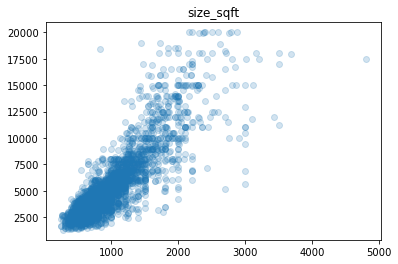

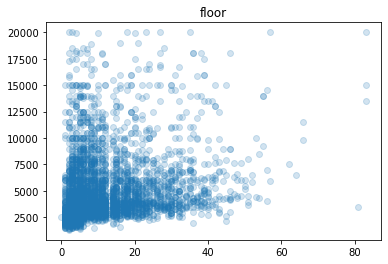

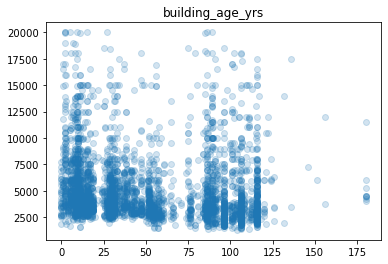

In [16]:
#선형 패턴 확인
#극단값 확인

import matplotlib.pyplot as plt
%matplotlib inline

for i in x.columns:
    plt.scatter(df[[i]], df[['rent']], alpha=0.2)
    plt.title(i)
    plt.show()

> size_sqft 변수에서 가장 선형성이 크게 나타난다.

In [17]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
#회귀계수 확인
#상수 확인

print('회귀계수 값:', mlr.coef_)
print('상수 값:', mlr.intercept_)

회귀계수 값: [[ 5.69569273 22.06184084 -9.34526075]]
상수 값: [21.08633653]


In [19]:
#독립변수 입력
#종속변수 예측

my_apartment = [[2000, 7.0, 10]]
my_predict = mlr.predict(my_apartment)

print(my_predict)

[[11473.45207958]]


In [20]:
#Test 데이터의 예측값 저장

y_predict = mlr.predict(x_test)

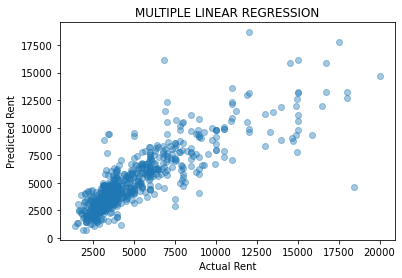

In [21]:
#x축: 실제 임대료, y축: 예측 임대료 

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [22]:
#모델평가

#Mean square error, 결정계수 구하기

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print('MSE:{0:.3f}'.format(mse))
print('Variance score(R-square): {0:.3f}'.format(r_squared))

MSE:2585042.503
Variance score(R-square): 0.715


In [23]:
#수정된 r-squared 구하기
#x_train.shape[1]: 독립변수의 개수

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print('adjust_r_squared score: {0:.3f}'.format(adjusted_r_squared))

adjust_r_squared score: 0.714


> R-square 값은 0.715로 모델을 잘 설명한다고 볼 수 있다.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [25]:
vif

,VIF Factor,features
0,3.229990,size_sqft
1,1.934162,floor
2,2.077154,building_age_yrs


> VIF가 10 이상인 변수는 없기 때문에 다중공선성 문제는 일어나지 않는다.

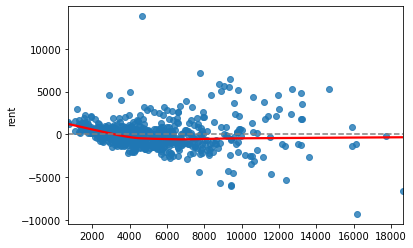

In [26]:
#잔차분석

#모형의 선형성
import seaborn as sns

residual = y_test - y_predict

sns.regplot(y_predict.flatten(), residual['rent'], lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')    

> 빨간 실선이 점선에 크게 벗어나지 않기 때문에 예측값에 따라 잔차가 크게 달라지지 않는다고 볼 수 있다.

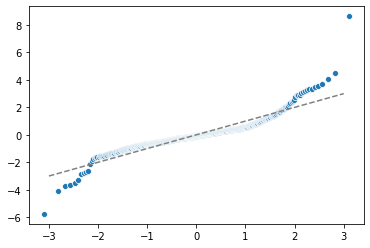

In [27]:
#잔차의 정규성
import scipy as sp

sr = sp.stats.zscore(residual['rent'])
(x1, y1), _ = sp.stats.probplot(sr)

sns.scatterplot(x1, y1)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [28]:
sp.stats.normaltest(residual['rent'])

NormaltestResult(statistic=252.66142461113193, pvalue=1.3654278313745359e-55)

> 중간에 분포한 값들은 대체적으로 정규분포를 따른다. 양 끝의 값들은 점선에서 많이 벗어났지만, sample의 사이즈가 크기 때문에 중요하지 않다.

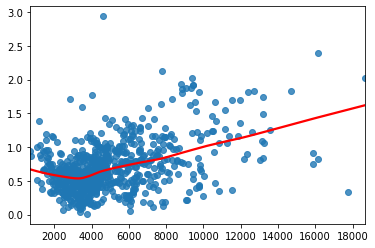

In [29]:
#잔차의 등분산성

#X축: 예측값
#Y축: 표준화 잔차

sns.regplot(y_predict.flatten(), np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

> 빨간 선이 수평이 아니고 증가하는 형태이기 때문에 등분산성은 지켜지지 않고 있다.

C:\Users\monde\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\monde\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\monde\anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:182: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warnin

<bound method Visualizer.show of CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BAA5172E0>)>

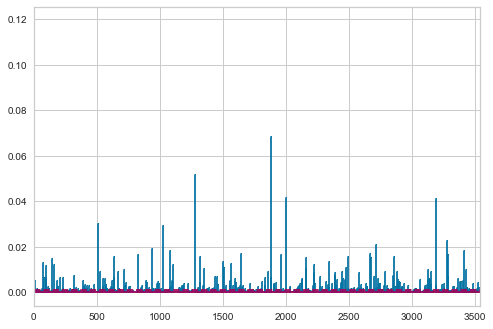

In [30]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

visualizer = CooksDistance()
visualizer.fit(x, y['rent'])
visualizer.show

In [31]:
visualizer.distance_.sort_values(ascending=False).head(10)

4       0.119512
1883    0.068199
1275    0.051516
1997    0.041619
3185    0.041078
507     0.030154
1024    0.029319
3276    0.022575
2715    0.020670
937     0.019208
dtype: float64

> Cook's distance는 비교적 작은 값들이 대다수이다. 값이 큰 변수들을 제외하고 분석을 하면 회귀 모델의 정확도가 올라갈 것이다.